# Scraping test of Subito

In [22]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep

# Set up Chrome options to run headless (without GUI) for better performance
chrome_options = Options()
# chrome_options.add_argument("--headless")
# chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration for headless mode
chrome_options.add_argument("--enable-javascript")
# Create a new Chrome instance with the specified options

chrome_driver = ChromeDriverManager().install()

driver = webdriver.Chrome(service=Service(chrome_driver), options=chrome_options)

# Set an implicit wait time to allow the page to load before accessing the elements
driver.implicitly_wait(10)  # Adjust the wait time (in seconds) as needed

# Replace 'your_dynamic_website_url' with the actual URL of the dynamic website you want to open
url = "https://www.idealista.it/vendita-case/trieste-provincia/"

try:
    # Open the URL
    driver.get(url)

    print(url)

    sleep(20)

    # Wait for the dynamic content to load (adjust the sleep time as needed)
    # You may use other dynamic waiting strategies provided by Selenium for better efficiency.

    # Get the page source (HTML) after the dynamic content has loaded
    page_source = driver.page_source

    # Close the browser window
    driver.quit()

    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, "html.parser")

    # Now you can work with the 'soup' object to extract information from the website
    # For example, you can find elements by their tags, classes, ids, etc., using the BeautifulSoup API.

    # Example: Find all the anchor tags on the page and print their URLs
    anchor_tags = soup.find_all("a")
    for tag in anchor_tags:
        print(tag.get("href"))

except Exception as e:
    print("An error occurred:", str(e))
    driver.quit()




====== WebDriver manager ======
Current google-chrome version is 115.0.5790
Get LATEST driver version for 115.0.5790


ValueError: There is no such driver by url https://chromedriver.storage.googleapis.com/LATEST_RELEASE_115.0.5790

In [11]:
from bs4 import BeautifulSoup
import requests

response = requests.get('https://www.casa.it/vendita/residenziale/trieste/')

soup = BeautifulSoup(response.text, "html.parser")

print(response.text)

# Now you can work with the 'soup' object to extract information from the website
# For example, you can find elements by their tags, classes, ids, etc., using the BeautifulSoup API.

# Example: Find all the anchor tags on the page and print their URLs
anchor_tags = soup.find_all("a")
for tag in anchor_tags:
    print(tag.get("href"))

<html><head><title>casa.it</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={'rt':'c','cid':'AHrlqAAAAAMAfl49Uv3xpvwAtRiK1w==','hsh':'0E632CB4F6D6AE00A12A90D239EBED','t':'bv','s':35053,'e':'9067623fe781be2cc170b831e08a0a6afdfb8280c3b5ee146b6e4c8f5b0bd99c','host':'geo.captcha-delivery.com'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>



[WDM] - ====== WebDriver manager ======
[WDM] - Driver [C:\Users\nehue\.wdm\drivers\edgedriver\win64\115.0.1901.188\msedgedriver.exe] found in cache


<html dir="ltr" lang="en"><head>
  <meta charset="utf-8">
  <meta name="theme-color" content="#fff">
  <meta name="viewport" content="width=device-width, initial-scale=1.0,
                                 maximum-scale=1.0, user-scalable=no">
  <title>www.idealista.it</title>
  <style>/* Copyright 2017 The Chromium Authors
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: var(--link-color);
}

body {
  --background-color: #fff;
  --error-code-color: var(--google-gray-700);
  --google-blue-100: rgb(210, 227, 252);
  --google-blue-300: rgb(138, 180, 248);
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-100: rgb(241, 243, 244);
  --google-gray-300: rgb(218, 220, 224);
  --google-gray-500: rgb(154, 160, 166);
  --google-gray-50: rgb(248, 249, 250);
  --google-gray-600: rgb(128, 134, 139);
  --google-gray-700: rgb(95, 99, 104);
  --google-gray-800: rgb(60, 64, 67);
  --goo
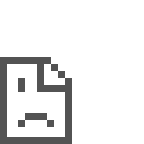
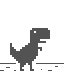
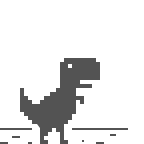
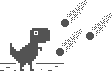
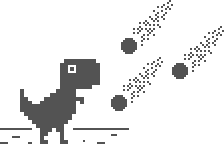
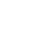

In [8]:
from selenium import webdriver
from msedge.selenium_tools import Edge, EdgeOptions
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup
from time import sleep

def run_selenium_with_edgedriver():
    # Set up Edge options to run headless (without GUI) for better performance
    edge_options = EdgeOptions()
    edge_options.use_chromium = True
    edge_options.add_argument("--enable-javascript")
    edge_options.add_argument("--user-agent")
    # edge_options.add_argument("--headless")
    # edge_options.add_argument("--disable-gpu")  # Disable GPU acceleration for headless mode
    # Adding argument to disable the AutomationControlled flag 
    
    # edge_options.add_argument("--disable-blink-features=AutomationControlled") 
    
    # # Exclude the collection of enable-automation switches 
    # edge_options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
    
    # # Turn-off userAutomationExtension 
    # edge_options.add_experimental_option("useAutomationExtension", False) 

    edge_options.add_argument(f'--proxy-server=144.217.197.151:38611')

    # Create an instance of the Edge WebDriver using msedge-selenium-tools and webdriver-manager
    driver = Edge(executable_path=EdgeChromiumDriverManager().install(), options=edge_options)

    # Set an implicit wait time to allow the page to load before accessing the elements
    driver.implicitly_wait(10)  # Adjust the wait time (in seconds) as needed

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

    # Replace 'your_dynamic_website_url' with the actual URL of the dynamic website you want to open
    url = "https://www.idealista.it/vendita-case/trieste-provincia/"

    try:
        # Open the URL
        driver.get(url)

        print(driver.page_source)

        # Wait for the dynamic content to load (adjust the sleep time as needed)
        # You may use other dynamic waiting strategies provided by Selenium for better efficiency.
        sleep(60)

        # Get the page source (HTML) after the dynamic content has loaded
        page_source = driver.page_source

        # Close the browser window
        driver.quit()

        # Parse the page source with BeautifulSoup
        soup = BeautifulSoup(page_source, "html.parser")

        # Now you can work with the 'soup' object to extract information from the website
        # For example, you can find elements by their tags, classes, ids, etc., using the BeautifulSoup API.

        # Example: Find all the anchor tags on the page and print their URLs
        anchor_tags = soup.find_all("a")
        for tag in anchor_tags:
            print(tag.get("href"))

    except Exception as e:
        print("An error occurred:", str(e))
        driver.quit()

if __name__ == "__main__":
    run_selenium_with_edgedriver()
